## Probabilistic Programming and Bayesian Inference for Time Series Analysis and Forecasting 

### There are two statistical inference methods:

    Bayesian inference
    Frequentist inference



## Content:
1. Bayes’ theorem

2. Basics of MCMC (Markov chain Monte Carlo)

3. Probabilistic programming

4. Time series model and forecasting [3]

## 1. Bayes’ Theorem

Let H be the hypothesis that an event will occur, D be new observed data (i.e., evidence), and p be the probability, the Bayes’ theorem can be described as follows:

p(H | D) = p(H) x p(D | H) / p(D)

    p(H): the prior probability of the hypothesis before we see any data
    p(H | D): the posterior probability of the hypothesis after we observe new data
    p(D | H): likelihood, the probability of data under the hypothesis
    p(D): the probability of data under any hypothesis

## 2. Basics of MCMC

MCMC consists of a class of algorithms for sampling from a probability distribution. One of the widely used algorithm is the Metropolis–Hastings algorithm. The essential idea is to randomly generate a large number of representative samples to approximate the continuous distribution over a multidimensional continuous parameter space.

A high-level description of the Metropolis algorithm can be expressed as follows:

    Step 1: Start at the current position (i.e., a vector of n-parameter values) in a n-parameters space
    Step 2: Propose to move to a new position (a new vector of n-parameter values)
    Step 3: Accept or reject the proposed movement based on the prior probability at the previous position, the data, and the posterior probability calculated from the data and its prior distributions according to Bayes’ theorem [3].
    Step 4: If the propose is accepted, then move to the new position. Otherwise, don’t move.
    Step 5: If a pre-specified number of steps has not yet been reached, go back to Step 1 to repeat the process. Otherwise, return all accepted positions.

## 3. Probabilistic Programming

There are multiple Python libraries that can be used to program Bayesian analysis and inference [3][5][7][8]. Such type of programming is called probabilistic programming [3][8] and the corresponding library is called probabilistic programming language. PyMC [3][7] and Tensorflow probability [8] are two examples.

## 4. Time Series Model and Forecasting

This section describes how to use PyMC [7] to program Bayesian analysis and inference for time series forecasting.

### I will be working on website traffic forecastin. Website Traffic Forecasting means forecasting traffic on a website during a particular period. It is one of the best use cases of Time Series Forecasting. 

In [46]:
# Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

### Loading dataset

In [47]:

data = pd.read_csv("websiteTraffic.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [48]:

# Converting date to day month and year format
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


In [49]:
data.head()

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973


### let’s have a look at the daily traffic of the website:

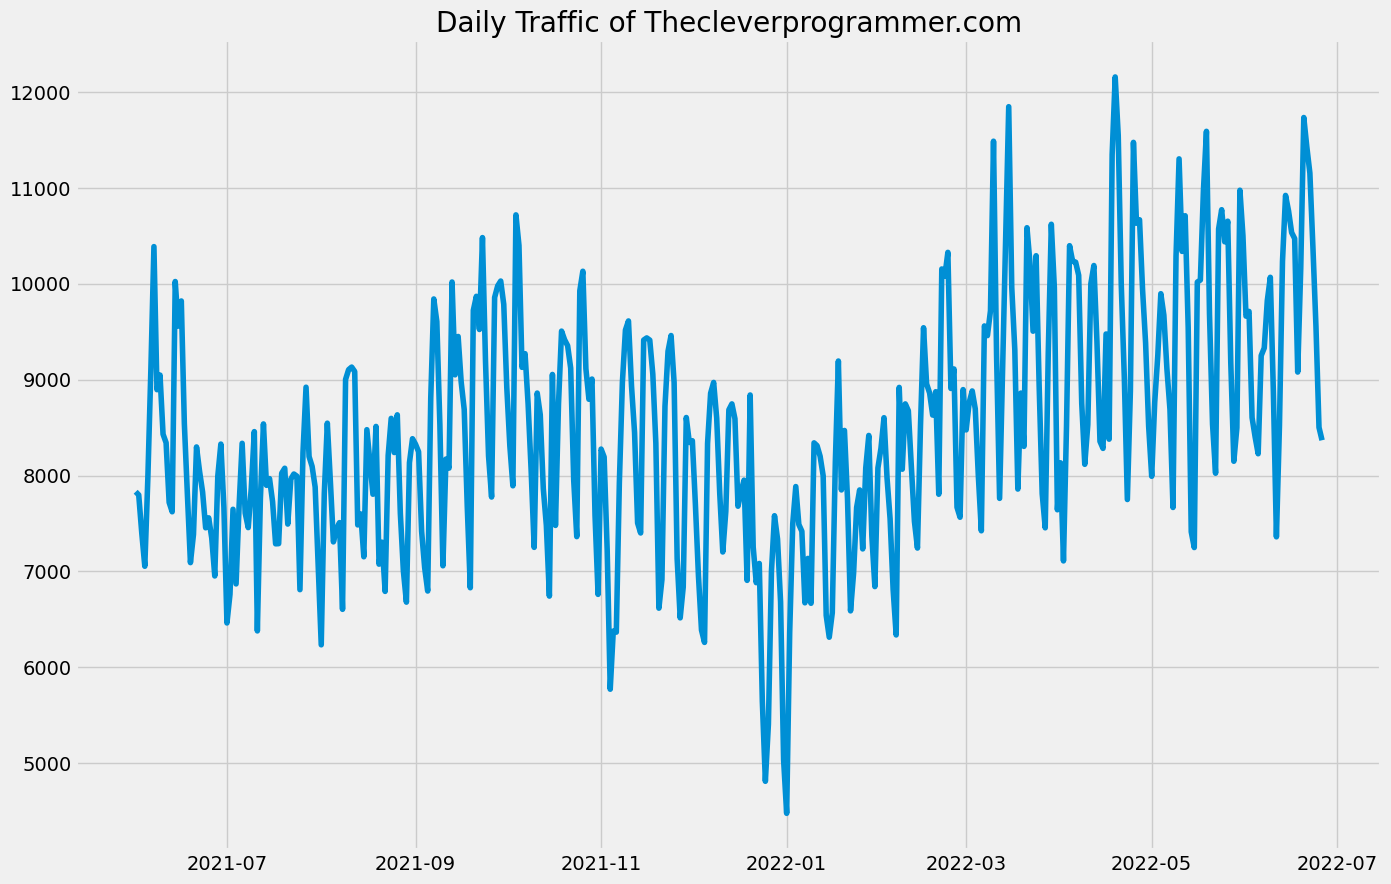

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

Our website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. 

### I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

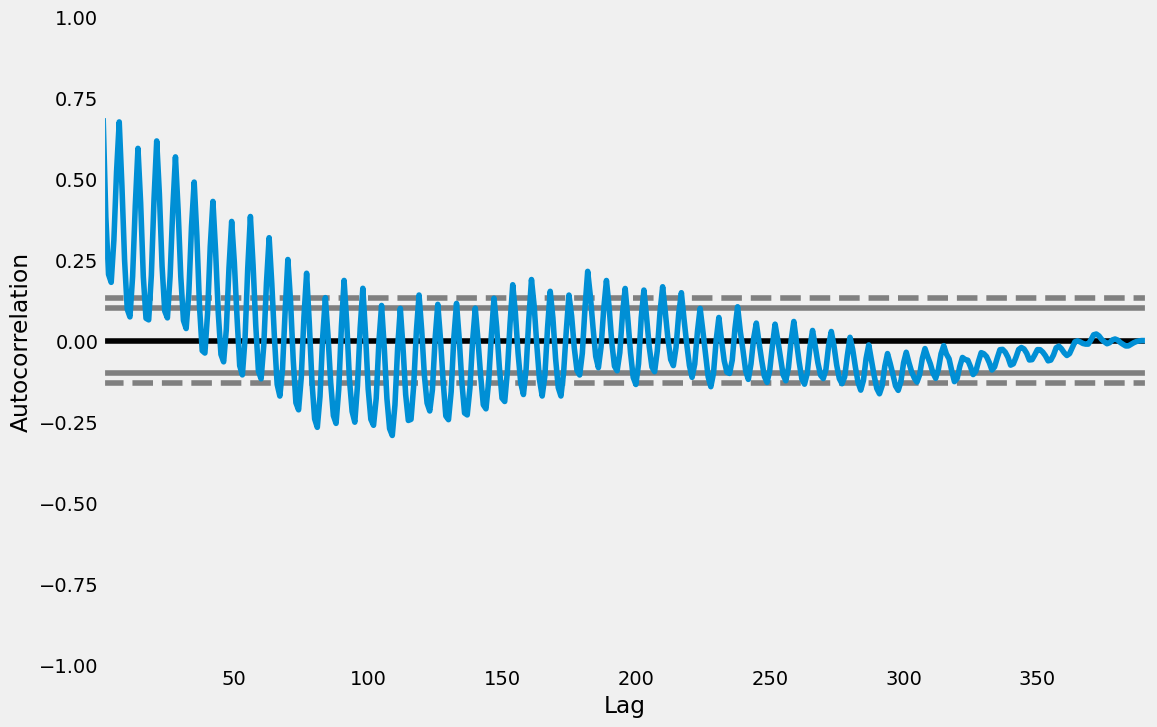

In [63]:
pd.plotting.autocorrelation_plot(data["Views"])

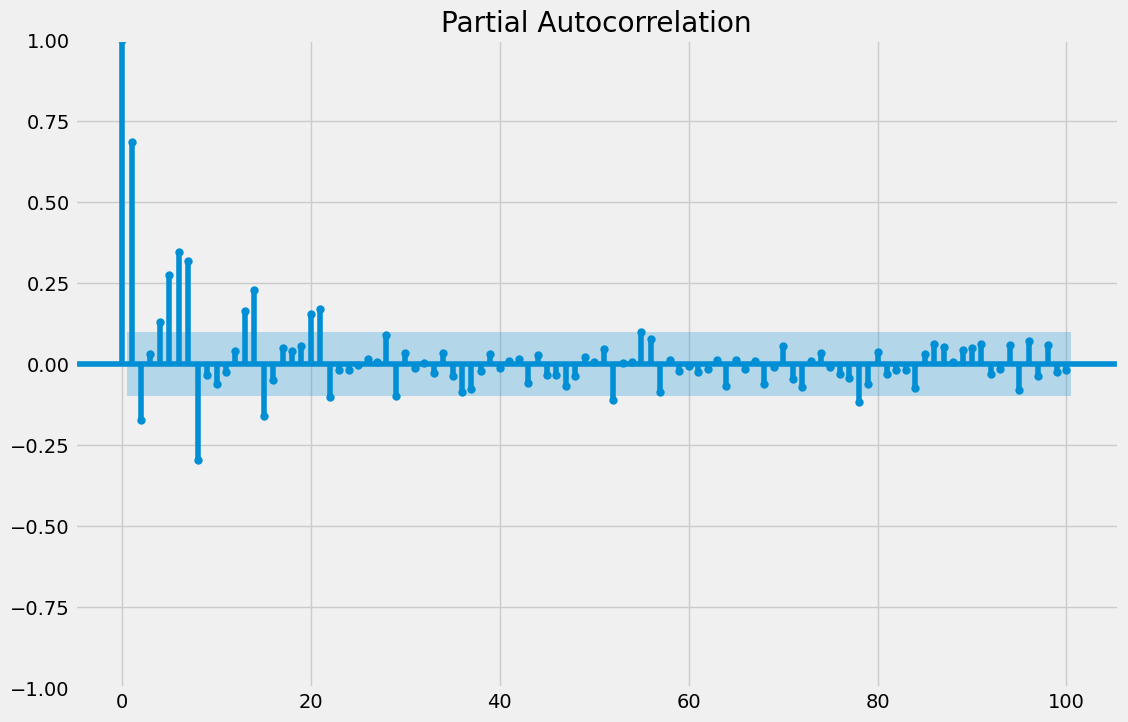

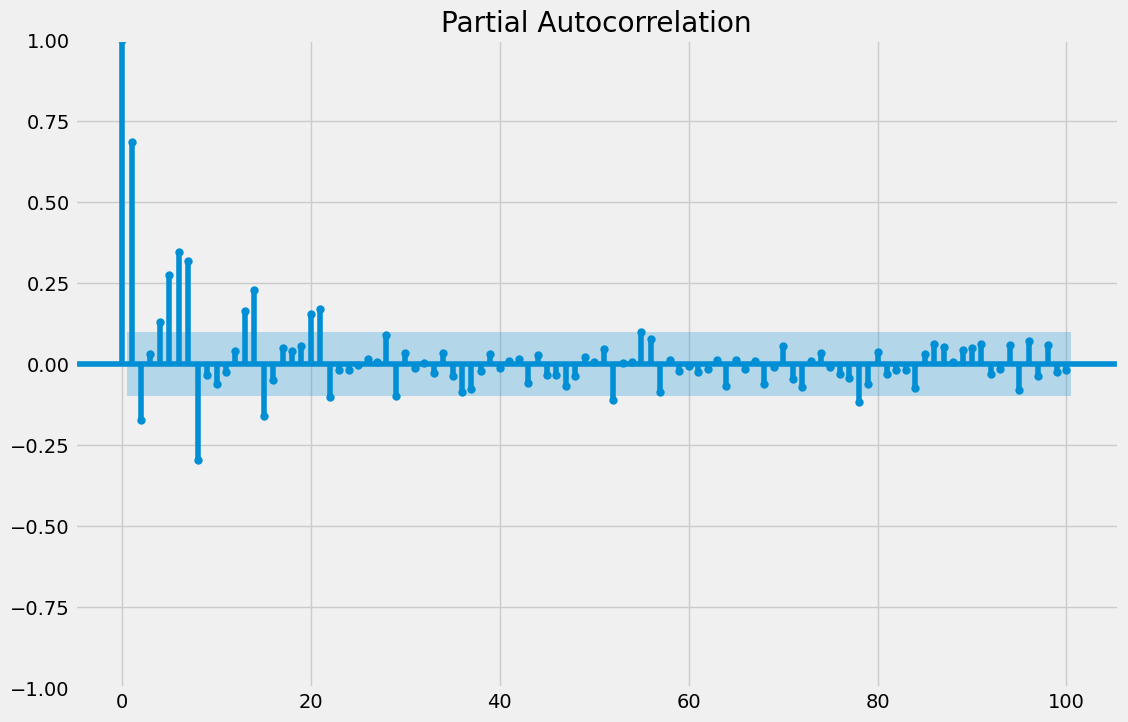

In [64]:
plot_pacf(data["Views"], lags = 100)

### here’s how we can train a SARIMA model for the task of website traffic forecasting:

In [65]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26940D+00    |proj g|=  5.28062D-01

At iterate    5    f=  8.06764D+00    |proj g|=  4.51780D-02

At iterate   10    f=  8.01428D+00    |proj g|=  4.59156D-02

At iterate   15    f=  7.98073D+00    |proj g|=  1.14090D-01

At iterate   20    f=  7.96097D+00    |proj g|=  1.73117D-02

At iterate   25    f=  7.95078D+00    |proj g|=  2.22036D-01

At iterate   30    f=  7.94313D+00    |proj g|=  1.85785D-01

At iterate   35    f=  7.93774D+00    |proj g|=  1.41117D-02

At iterate   40    f=  7.93365D+00    |proj g|=  2.63263D-02

At iterate   45    f=  7.92964D+00    |proj g|=  2.46097D-02

At iterate   50    f=  7.92689D+00    |proj g|=  4.66228D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.414
Date:                            Thu, 27 Jun 2024   AIC                           6228.828
Time:                                    21:13:12   BIC                           6287.851
Sample:                                         0   HQIC                          6252.253
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7965      0.133      5.967      0.000       0.535       1.058
ar.L2         -0.7892      0.136   

### Now let’s forecast traffic on the website for the next 20 days:

In [66]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

391     9862.390662
392    10769.833543
393    10723.207493
394     9834.140765
395     8749.462546
396     8194.355866
397     8904.416361
398     9679.019159
399    10269.063031
400    10590.913220
401     9787.798037
402     9319.238057
403     9017.838888
404     9056.435812
405    10526.278765
406    10987.583997
407    10839.452526
408    10019.178973
409     9404.903360
410     8597.308788
411     9143.980521
Name: predicted_mean, dtype: float64


<Axes: >

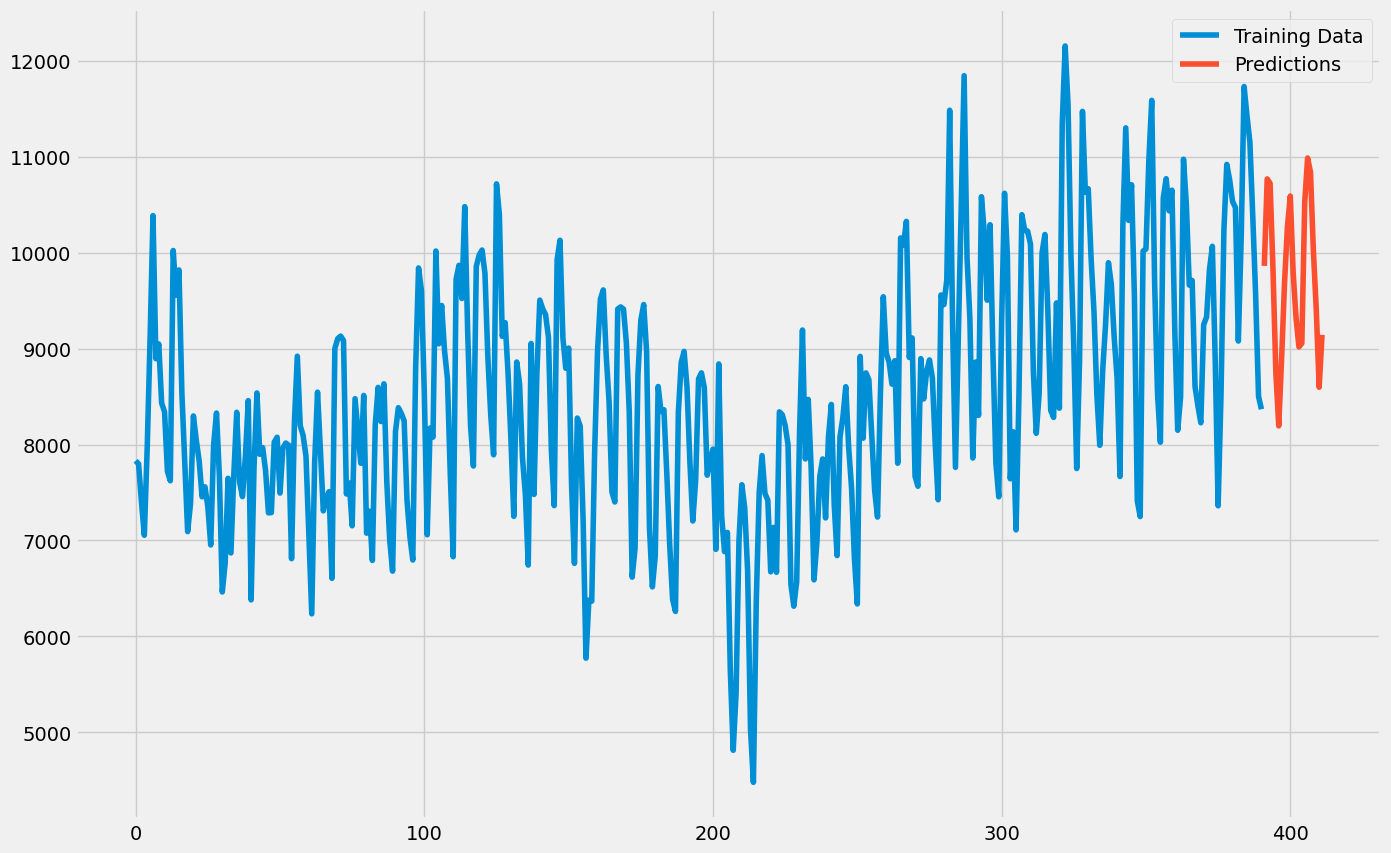

In [68]:
# Here’s how we can plot the predictions:

data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")